In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [22]:
traindata=pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
print('Data type:',type(traindata))
print('Data dimensions',traindata.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dimensions (1460, 81)


In [24]:
print(traindata.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [25]:
traindata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [26]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [27]:
traindata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
traindatanumeric = traindata.select_dtypes(include=np.int64)
print('Data dimensions',traindatanumeric.shape)
traindatanumeric.info()

Data dimensions (1460, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars     

In [29]:
txt=pd.read_table("datadescription.txt",sep="\s+",header=None)
txt.head()

ParserError: Error tokenizing data. C error: Expected 10 fields in line 56, saw 12


In [31]:
traindatanumeric=traindatanumeric.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'],axis=1)

In [32]:
traindatanumeric.head()

,Id,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,8450,706,0,150,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,2,9600,978,0,284,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,3,11250,486,0,434,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,4,9550,216,0,540,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,5,14260,655,0,490,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [33]:
traindatanumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
Id               1460 non-null int64
LotArea          1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
Scree

In [39]:
SalePrice = pd.DataFrame(traindatanumeric['SalePrice'])
print('Data type:',type(SalePrice))
print('Data dimensions:',SalePrice.size)
SalePrice.head()

Data type: <class 'pandas.core.frame.DataFrame'>
Data dimensions: 1460


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [46]:
SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


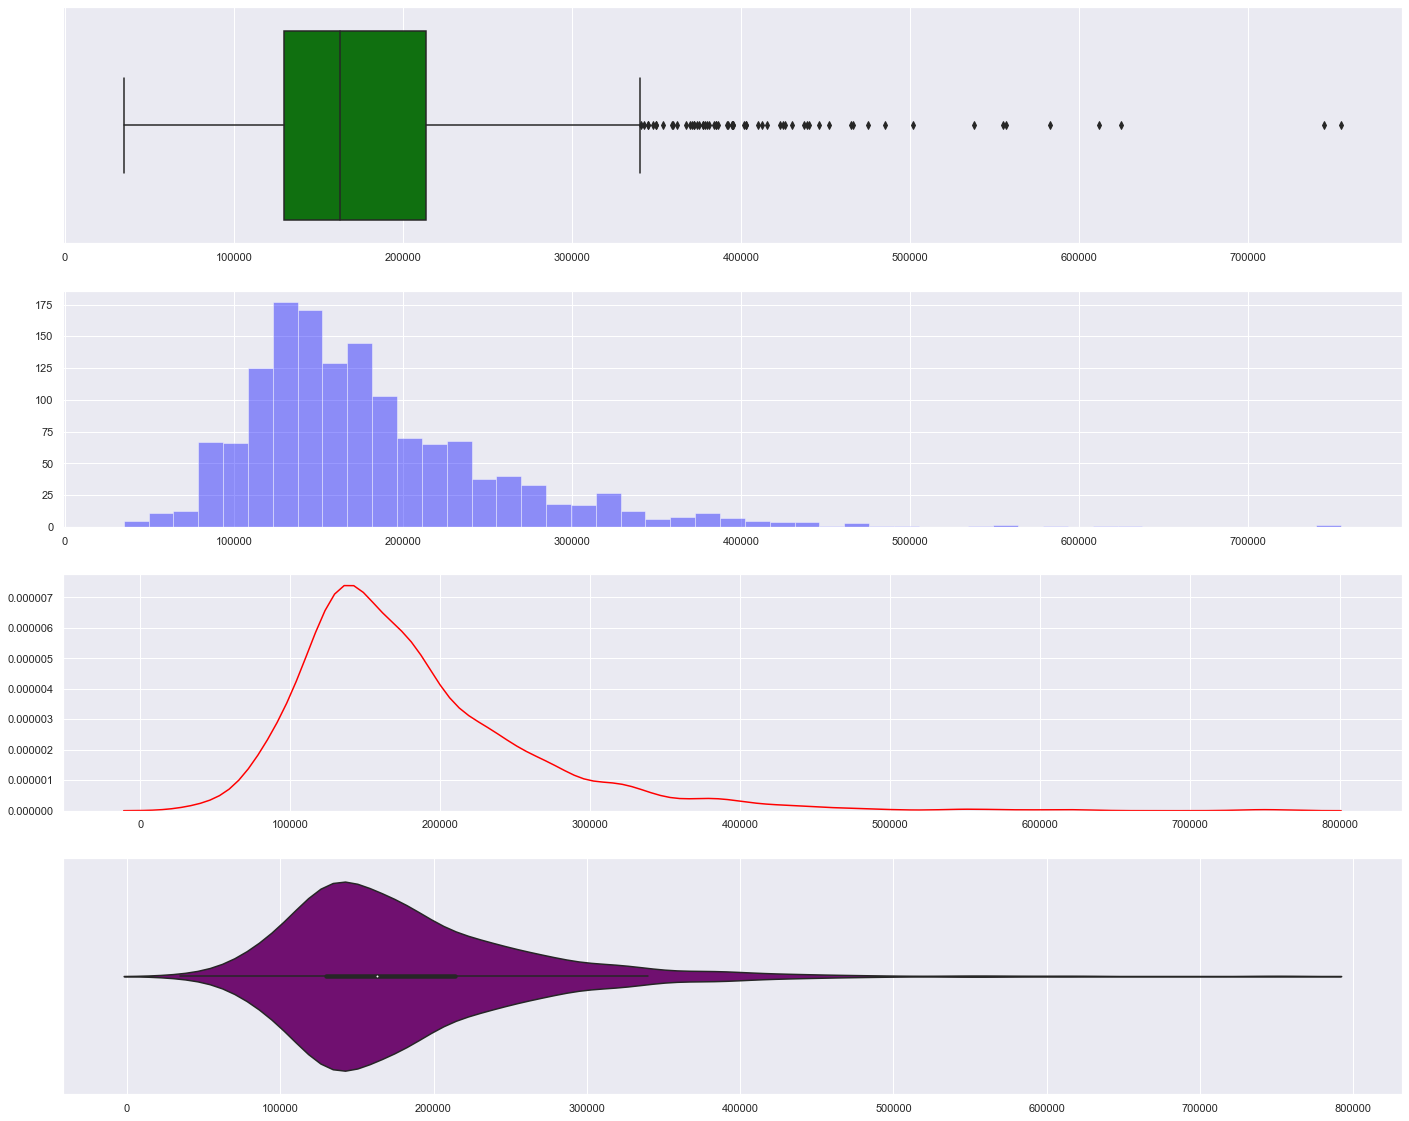

In [57]:
f,axes=plt.subplots(4,1,figsize=(24,20))
sb.boxplot(SalePrice,orient='h',color='green',ax=axes[0])
sb.distplot(SalePrice,kde=False,color='blue',ax=axes[1])
sb.distplot(SalePrice,hist=False,color='red',ax=axes[2])
sb.violinplot(SalePrice,color='purple',ax=axes[3])

In [58]:
lotarea=pd.DataFrame(traindatanumeric['LotArea'])
print('Data types:',type(lotarea))
print('Data dimesions',lotarea.shape)
lotarea.head()

Data types: <class 'pandas.core.frame.DataFrame'>
Data dimesions (1460, 1)


,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [59]:
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


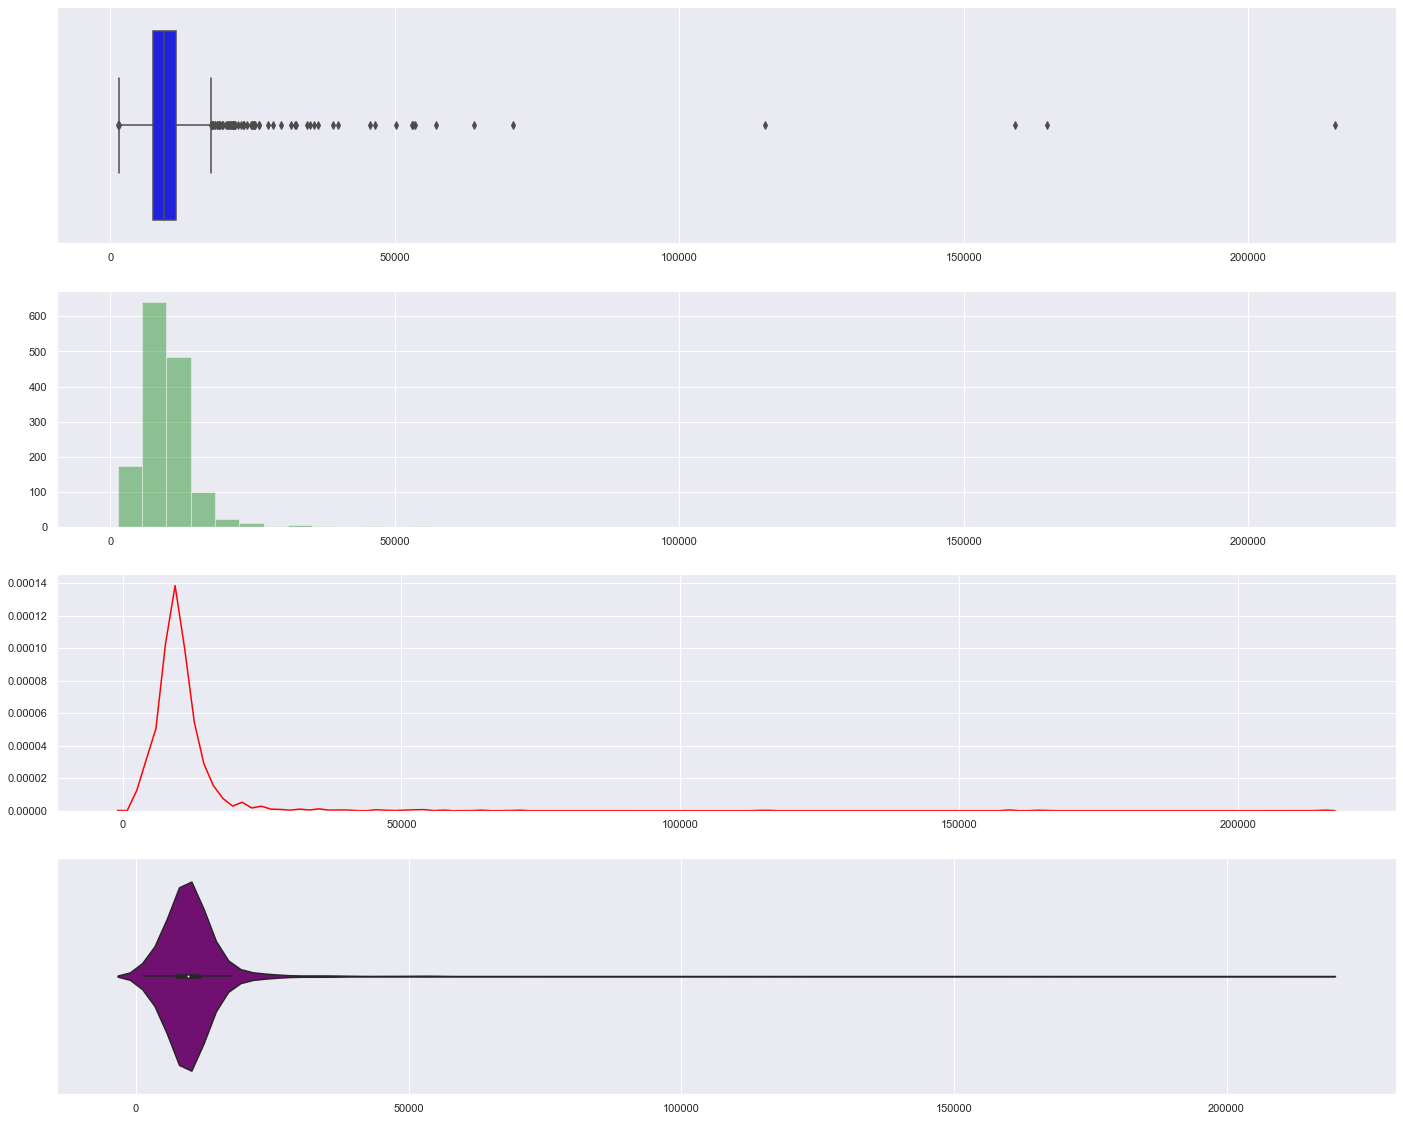

In [60]:
f,axes=plt.subplots(4,1,figsize=(24,20))
sb.boxplot(lotarea,orient='h',color='blue',ax=axes[0])
sb.distplot(lotarea,color='green',kde=False,ax=axes[1])
sb.distplot(lotarea,color='red',hist=False,ax=axes[2])
sb.violinplot(lotarea,color='purple',ax=axes[3])

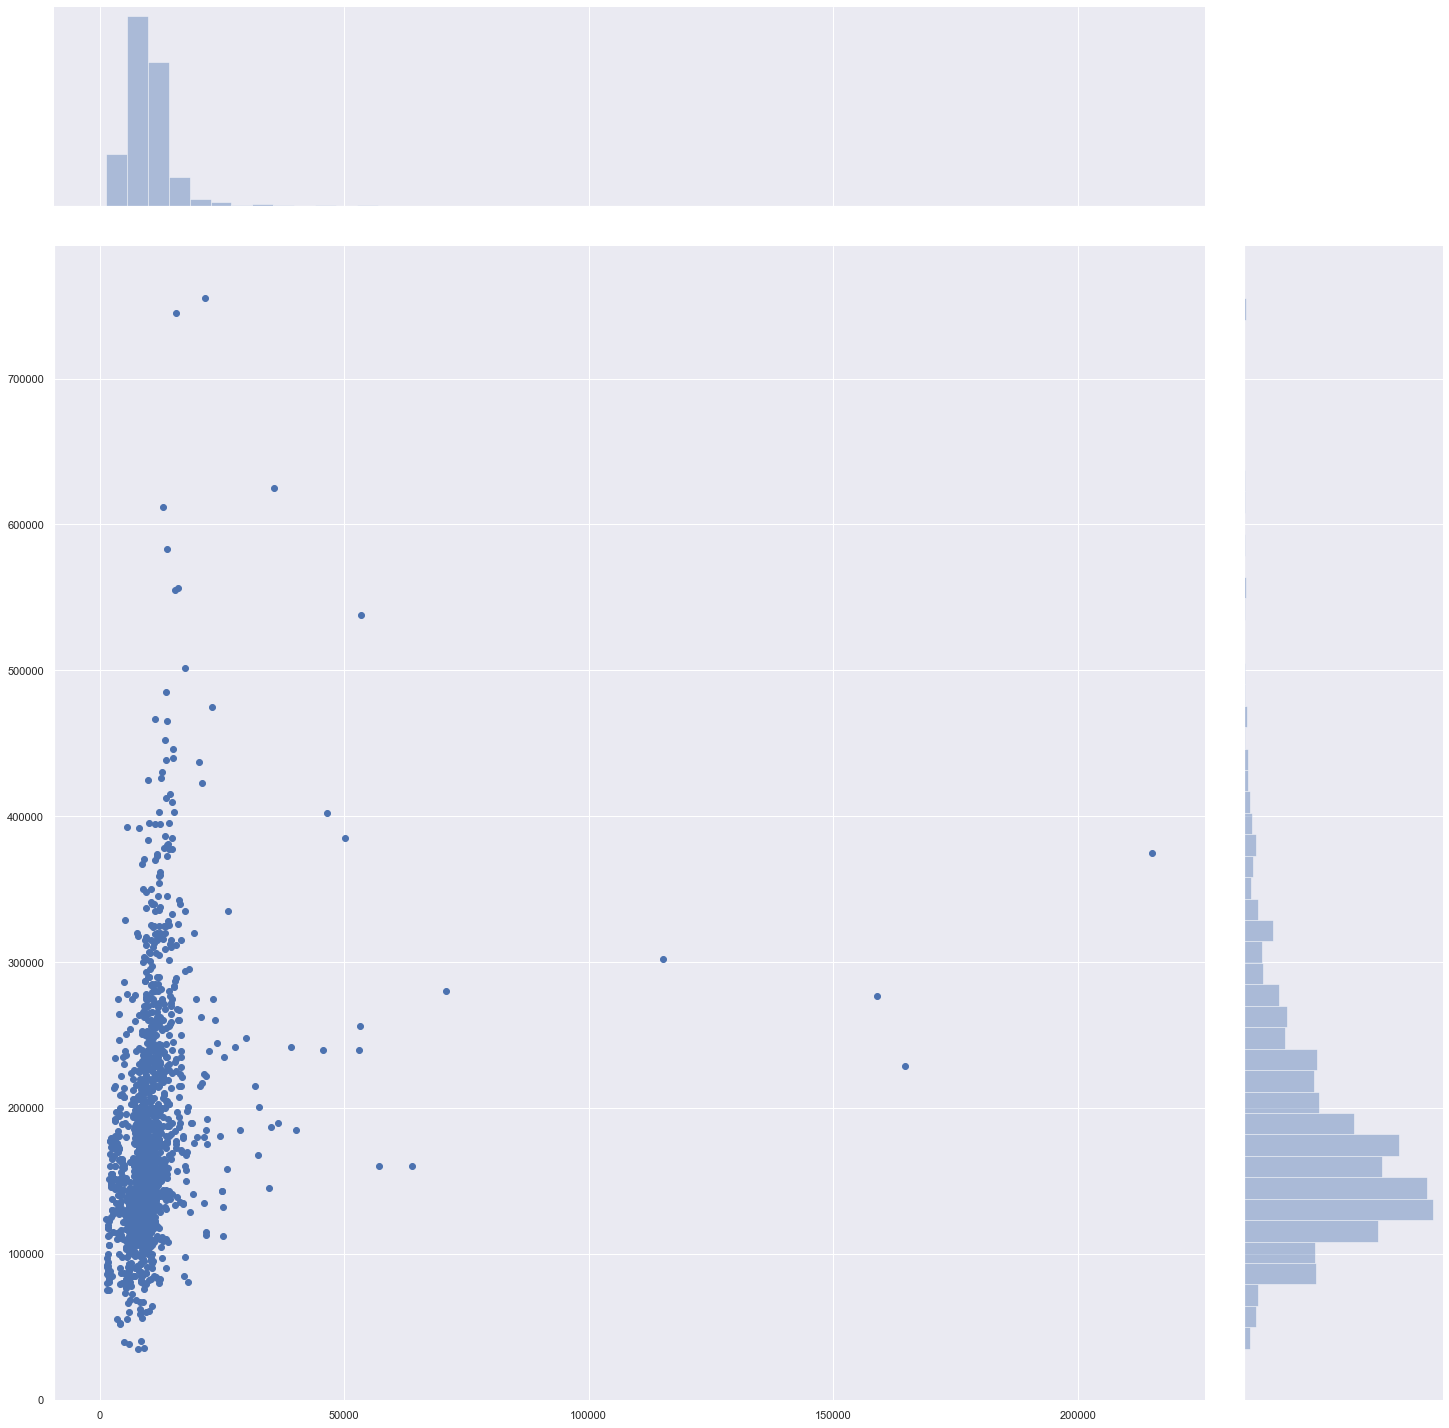

In [62]:
sb.jointplot(y=SalePrice,x=lotarea,height=20)

In [65]:
jointDF=pd.concat([lotarea,SalePrice],axis=1,join_axes=[lotarea.index])
jointDF.corr()

C:\Users\Ryan Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


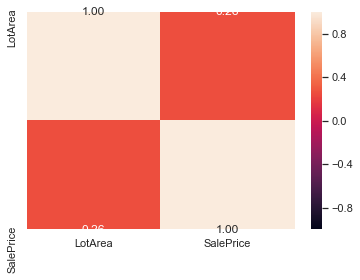

In [70]:
sb.heatmap(jointDF.corr(), vmin= -1,vmax= 1,annot=True,fmt='.2f')

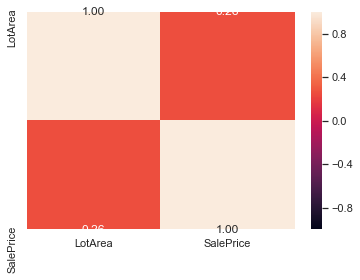

In [71]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [75]:
jointDF=pd.concat([lotarea,SalePrice],axis=1,join_axes=[lotarea.index])
jointDF.corr()

C:\Users\Ryan Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000
